In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [2]:
df=pd.read_csv('airline.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


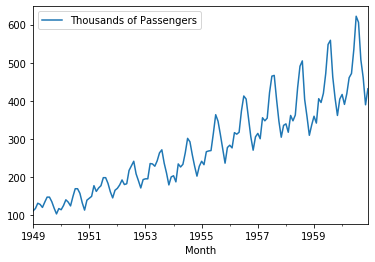

In [3]:
df.plot()

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(df['Thousands of Passengers'])

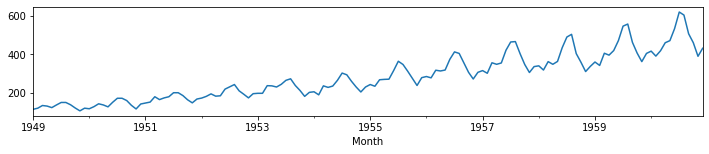

In [5]:
results.observed.plot(figsize=(12,2))

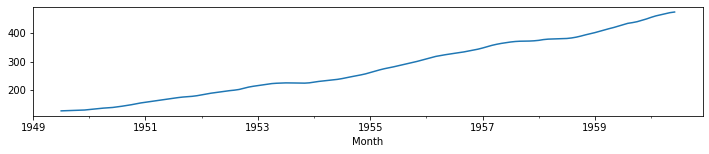

In [6]:
results.trend.plot(figsize=(12,2))

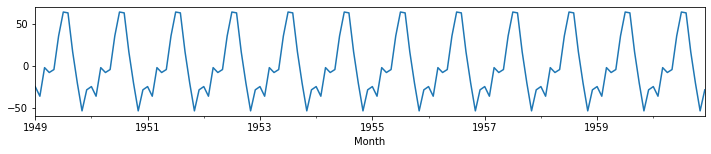

In [7]:
results.seasonal.plot(figsize=(12,2))

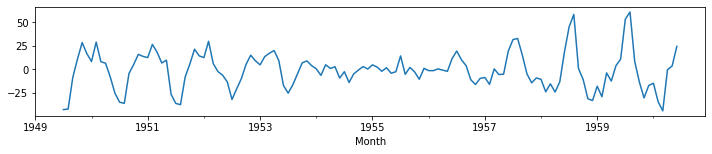

In [8]:
results.resid.plot(figsize=(12,2))

In [9]:
n=len(df['Thousands of Passengers'])
critical_values=[]
for i in range(41):
    value=1.96/np.sqrt(n-i)
    critical_values.append(value)
dd=pd.DataFrame(acf(df['Thousands of Passengers']),columns=['ACF'])
dd['Abs(Critical Value)']=critical_values
dd.head(20)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


,ACF,Abs(Critical Value)
0,1.000000,0.163333
1,0.948047,0.163903
2,0.875575,0.164480
3,0.806681,0.165062
4,0.752625,0.165650
5,0.713770,0.166245
6,0.681734,0.166846
7,0.662904,0.167454
8,0.655610,0.168069
9,0.670948,0.168690


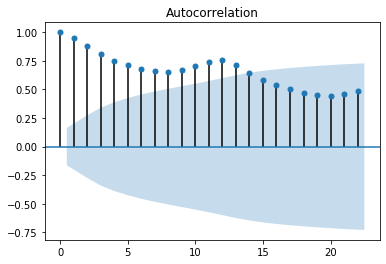

In [10]:
plot_acf(df['Thousands of Passengers']);

In [11]:
n=len(df['Thousands of Passengers'])
critical_values=[]
for i in range(41):
    value=1.96/np.sqrt(n-i)
    critical_values.append(value)
dd=pd.DataFrame(pacf(df['Thousands of Passengers']),columns=['ACF'])
dd['Abs(Critical Value)']=critical_values
dd.head(20)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


,ACF,Abs(Critical Value)
0,1.000000,0.163333
1,0.954677,0.163903
2,-0.265277,0.164480
3,0.055470,0.165062
4,0.108856,0.165650
5,0.081126,0.166245
6,0.004125,0.166846
7,0.156170,0.167454
8,0.103708,0.168069
9,0.288781,0.168690


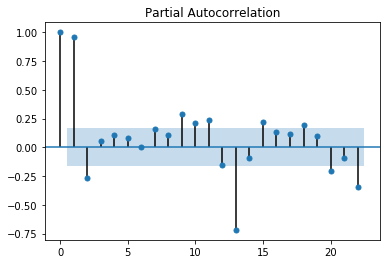

In [12]:
plot_pacf(df['Thousands of Passengers']);

In [13]:
train=df[:n-12]
test=df[n-12:]

## RNN

In [14]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [16]:
n_input = 12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit_generator(generator,epochs=30)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 120 steps
Epoch 1/30
120/120 [==============================] - 5s 44ms/step - loss: 0.0251
Epoch 2/30
120/120 [==============================] - 2s 19ms/step - loss: 0.0109
Epoch 3/30
120/120 [==============================] - 2s 21ms/step - loss: 0.0134
Epoch 4/30
120/120 [==============================] - 2s 19ms/step - loss: 0.0083
Epoch 5/30
120/120 [==============================] - 3s 23ms/step - loss: 0.0105: 0s - loss:
Epoch 6/30
120/120 [==============================] - 2s 20ms/step - loss: 0.0087: 0s - loss: 0.00
Epoch 7/30
120/120 [==============================] - 2s 14ms/step - loss: 0.0098
Epoch 8/30
120/120 [==============================] - 2s 14ms/step - loss: 0.0086
Epoch 9/30
120/120 [==============================] - 1s 11ms/step - loss: 0.0072
Epoch 10/30
120/120 [==============================] - 1s 11ms/step - loss: 0.0039
Epoch 11/30
120/120 [========

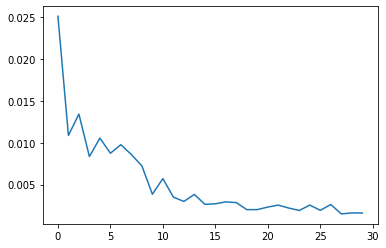

In [20]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [21]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [22]:
true_predictions = scaler.inverse_transform(test_predictions)

In [23]:
test['Predictions'] = true_predictions

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
test.head()

,Thousands of Passengers,Predictions
Month,,
1960-01-01,417,385.807051
1960-02-01,391,392.994830
1960-03-01,419,417.022708
1960-04-01,461,436.578344
1960-05-01,472,484.452965


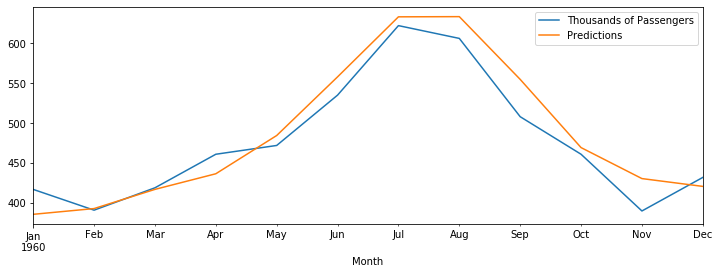

In [25]:
test.plot(figsize=(12,4))

In [26]:
error1 = mean_squared_error(test['Thousands of Passengers'], true_predictions)
error2 = np.sqrt(mean_squared_error(test['Thousands of Passengers'], true_predictions))
print(f'RNN MSE: {error1}')
print(f'RNN RMSE: {error2}')
rmse

RNN MSE: 594.9664807730397
RNN RMSE: 24.39193474845814


<function statsmodels.tools.eval_measures.rmse(x1, x2, axis=0)>

## ARIMA

In [27]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [28]:
auto_arima(train['Thousands of Passengers'],seasonal=True)

ARIMA(order=(2, 1, 1))

In [29]:
auto_arima(train['Thousands of Passengers'],seasonal=True,m=12,error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 01 Sep 2020   AIC                            905.686
Time:                                    10:28:58   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (Q):                       37.41   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.59   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
stepwise_fit = auto_arima(train['Thousands of Passengers'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=907.364, BIC=921.302, Time=1.862 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=1022.234, BIC=1027.809, Time=0.073 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=906.857, BIC=918.007, Time=1.405 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=963.555, BIC=974.705, Time=1.346 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=1192.711, BIC=1195.499, Time=0.062 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=907.180, BIC=915.542, Time=0.341 seconds
Fit ARIMA(1,0,0)x(2,1,0,12) [intercept=True]; AIC=908.543, BIC=922.480, Time=5.724 seconds
Fit ARIMA(1,0,0)x(1,1,1,12) [intercept=True]; AIC=907.563, BIC=921.500, Time=4.617 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(1,0,0)x(0,1,1,12) [intercept=True]; AIC=907.120, BIC=91

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 01 Sep 2020   AIC                            905.686
Time:                                    10:29:53   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (Q):                       37.41   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.59   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model = SARIMAX(train['Thousands of Passengers'],order=(3, 0, 0),seasonal_order=(0, 1, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -451.953
Date:                            Tue, 01 Sep 2020   AIC                            911.907
Time:                                    10:29:54   BIC                            923.056
Sample:                                01-01-1949   HQIC                           916.435
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7603      0.088      8.672      0.000       0.588       0.932
ar.L2          0.2875      0.133      2.164      0.030       0.027       0.548
ar.L3         -0.0823      0.109     -0.752      0.452      -0.297       0.132
sigma2       107.0022     13.170      8.125      0.000      81.190     132.814
===================================================================================
Ljung-Box (Q):                       41.63   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.40   Prob(JB):                         0.38
Heteroskedasticity (H):               1.44   Skew:                            -0.10
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,0,0)(0,1,0,12) Predictions')

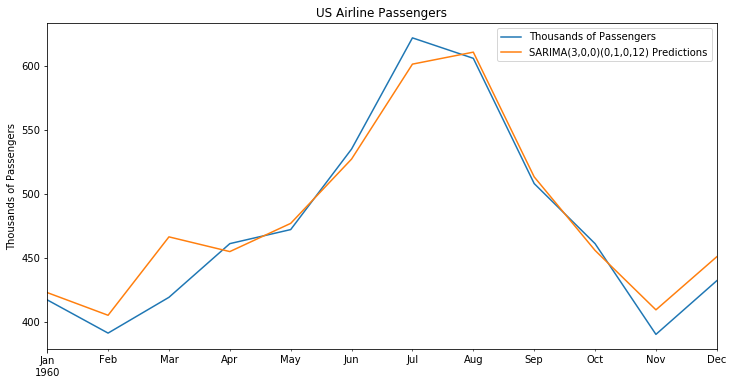

In [33]:
title='US Airline Passengers'
ylabel='Thousands of Passengers'
xlabel=''

ax = test['Thousands of Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [34]:
error1 = mean_squared_error(test['Thousands of Passengers'], predictions)
error2 = rmse(test['Thousands of Passengers'], predictions)
print(f'SARIMA(3,0,0)(0,1,0,12) Predictions MSE Error: {error1:11.10}')
print(f'SARIMA(3,0,0)(0,1,0,12) Predictions RMSE Error: {error2:11.10}')

SARIMA(3,0,0)(0,1,0,12) Predictions MSE Error: 317.3956152
SARIMA(3,0,0)(0,1,0,12) Predictions RMSE Error: 17.81560033


In [35]:
#looks like ARIMA MODEL IS PERFORING BETTER